# Milestone Project

Code by: Marziyeh Bahalou Horeh

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [5]:
df.shape
df.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [6]:
pd.set_option('display.max_column',26)

In [7]:
df.columns = df.columns.str.replace(" ", "_")

df.columns = df.columns.str.lower()

#### How many different companies are represented in the data set?

In [8]:
df['company_name'].nunique()

439

There are 439 unique company names.

In [55]:
df['company_type'].nunique()

2

There are 2 different company types.

#### What is the total number of jobs created for businesses in Queens?

In [9]:
filt = (df["city"] == 'Queens')

In [10]:
df.loc[filt].shape

(67, 26)

In [11]:
df_queends = df[df["city"] == 'Queens']

In [12]:
df_queends["job_created"].sum()

90.0

Total number of jobs created for businesses in Queens is 90.

#### How many different unique email domain names are there in the data set?

In [13]:
df['email_domain'] = df['company_email'].str.split("@").str[1]
df
df['email_domain'].nunique()

356

There are 356 different unique email domain names are there in the data set.

#### Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [14]:
df['nta'].value_counts()

Hunters Point-Sunnyside-West Maspeth        75
Sunset Park West                            48
Queensbridge-Ravenswood-Long Island City    16
park-cemetery-etc-Brooklyn                  15
Greenpoint                                  14
                                            ..
Washington Heights South                     1
Forest Hills                                 1
Morrisania-Melrose                           1
Ocean Hill                                   1
Co-op City                                   1
Name: nta, Length: 79, dtype: int64

In [56]:
nta_grp = df.groupby(['nta'])

In [17]:
nta_grp['job_created'].agg(['mean','sum'])

,mean,sum
nta,,
Astoria,NaN,0.0
Baisley Park,NaN,0.0
Battery Park City-Lower Manhattan,NaN,0.0
Bedford,NaN,0.0
Bensonhurst West,NaN,0.0
...,...,...
Whitestone,10.0,10.0
Williamsburg,NaN,0.0
Windsor Terrace,NaN,0.0


In [18]:
counts = df['nta'].value_counts() 

In [19]:
filt = counts.index[counts >= 5]

In [57]:
filt

Index(['Hunters Point-Sunnyside-West Maspeth', 'Sunset Park West',
       'Queensbridge-Ravenswood-Long Island City',
       'park-cemetery-etc-Brooklyn', 'Greenpoint', 'Mott Haven-Port Morris',
       'Hunts Point', 'East Williamsburg',
       'Carroll Gardens-Columbia Street-Red Hook', 'Bushwick South',
       'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill', 'East New York',
       'Maspeth', 'Crown Heights North', 'Manhattanville',
       'Battery Park City-Lower Manhattan', 'Steinway', 'College Point',
       'Springfield Gardens South-Brookville',
       'SoHo-TriBeCa-Civic Center-Little Italy'],
      dtype='object')

In [20]:
new_df = df[df['nta'].isin(filt)]
new_df_grp = new_df.groupby(['nta'])
new_df.to_csv("new_df.csv")

In [21]:
mean_grp = new_df_grp['total_savings'].mean()
sum_grp = new_df_grp['job_created'].sum()

In [22]:
df_res = pd.concat([mean_grp,sum_grp], axis='columns', sort=False)

In [23]:
df_res.rename(columns = {'total_savings': "mean_total_saving", 'job_created':'total_job_created'}, inplace = True)

In [24]:
df_res.to_csv("Day4results1.csv")

#### Scatter plot of jobs created versus average savings.

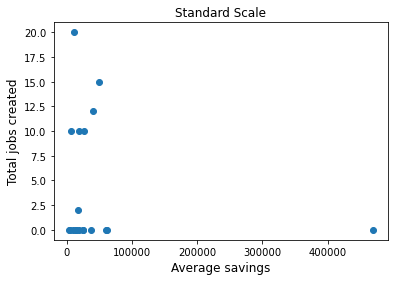

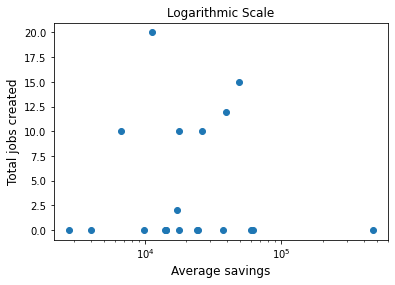

In [25]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.scatter(mean_grp,sum_grp)
ax.set_xlabel('Average savings', fontsize=12)
ax.set_ylabel('Total jobs created', fontsize=12)
ax.set_title('Standard Scale')


fig, ax = plt.subplots()
plt.scatter(mean_grp,sum_grp)
ax.set_xlabel('Average savings', fontsize=12)
ax.set_ylabel('Total jobs created', fontsize=12)
ax.set_title('Logarithmic Scale')
plt.xscale("log")

plt.subplots_adjust(wspace=0.3)
plt.show()

#### Histogram of the log of the average total savings.

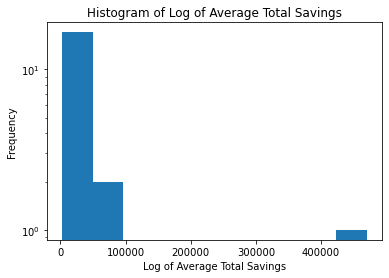

In [58]:
import numpy as np

fix, ax=plt.subplots()
ax.hist(mean_grp,log=True)
ax.set_xlabel('Log of Average Total Savings')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Log of Average Total Savings')

plt.show()

#### Line plot of the total jobs created for each month for NTAs with more than 5 businesses

In [27]:
new_df_copy = new_df.copy()
new_df_copy['effective_date'] = pd.to_datetime(new_df_copy['effective_date'])

In [28]:
new_df_copy['month'] = pd.to_datetime(new_df_copy['effective_date']).dt.to_period('M')

In [29]:
new_df_copy['month'].head()
jobs_montly = new_df_copy.groupby('month')
tot_job_montly = jobs_montly['job_created'].sum()

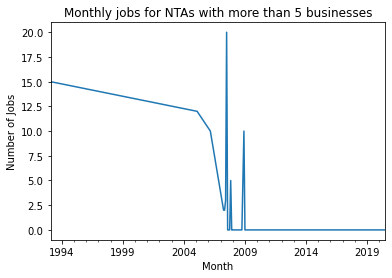

In [52]:
tot_job_montly.plot()

plt.xlabel("Month")
plt.ylabel("Number of Jobs")
plt.title("Monthly jobs for NTAs with more than 5 businesses")

plt.show()

#### Line plot of the total jobs created for each month for all NTAs 

In [45]:
try:
    df['effective_date'] = pd.to_datetime(df['effective_date'], format='%m/%d/%Y')
except ValueError as e:
    print(f"Error: {e}")
    

In [49]:
df['month']=pd.to_datetime(df['effective_date']).dt.to_period('M')

In [51]:
tot_job_montly_allnta = df.groupby('month')['job_created'].sum()

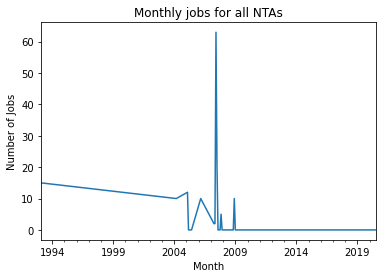

In [54]:
tot_job_montly_allnta.plot()

plt.xlabel("Month")
plt.ylabel("Number of Jobs")
plt.title("Monthly jobs for all NTAs")

plt.show()